In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('../data/titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
pwd

'/Users/wzhang/GeneralAssembly/DAT-06-24/class material/Unit 2/Lesson 6'

In [6]:
df['family_size'] = df['SibSp'] + df['Parch']

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [8]:
np.where(df.Age > 35, 'Old', 'Young')

array(['Young', 'Old', 'Young', 'Young', 'Young', 'Young', 'Old', 'Young',
       'Young', 'Young', 'Young', 'Old', 'Young', 'Old', 'Young', 'Old',
       'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Young', 'Old', 'Young', 'Young', 'Young', 'Young', 'Old',
       'Young', 'Young', 'Old', 'Young', 'Old', 'Young', 'Young', 'Young',
       'Young', 'Old', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Old',
       'Young', 'Old', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Old', 'Old', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Young', 'Young', 'Old', 'Young', 'Old', 'Young', 'Old',
       'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young',


In [9]:
df['old_young'] = np.where(df.Age > 35, 'Old', 'Young')

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,old_young
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Old
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Young


In [11]:
df[['old_young', 'Age']].head(10)

,old_young,Age
0,Young,22.0
1,Old,38.0
2,Young,26.0
3,Young,35.0
4,Young,35.0
5,Young,NaN
6,Old,54.0
7,Young,2.0
8,Young,27.0
9,Young,14.0


In [40]:
conditions = [
    (df.Sex == 'male') & (df.Age >= 35),
    (df.Sex == 'male') & (df.Age < 35),
    (df.Sex == 'female') & (df.Age >= 35),
    (df.Sex == 'female') & (df.Age < 35)
]


results = [
    'M-Old',
    'M-Young',
    'F-Old',
    'F-Young'   
]

df['Age_Status'] = np.select(conditions, results, 'Other')

345 µs ± 8.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
%timeit df['Age_Status'] = np.select(conditions, results, 'Other')

347 µs ± 7.56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
%timeit df['Age_Status2'] = np.select(conditions, results, 'Other')

345 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,old_young,Age_Status,ticket_type,ticket_fare2,odd_even_age,Age_Status2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,Young,M-Young,economy,economy,even,M-Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0,1,Old,F-Old,economy,vip,even,F-Old
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0,Young,F-Young,economy,economy,even,F-Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.0,1,Young,F-Old,economy,business,odd,F-Old
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1.0,0,Young,M-Old,economy,economy,odd,M-Old


In [14]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,old_young,Age_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Young,M-Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Old,F-Old
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Young,F-Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Young,F-Old
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Young,M-Old
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,Young,Other
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,Old,M-Old
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,Young,M-Young
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,Young,F-Young
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,Young,F-Young


In [15]:
df['Age_Status'].value_counts()

M-Young    299
F-Young    180
Other      177
M-Old      154
F-Old       81
Name: Age_Status, dtype: int64

In [18]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
new_vals = {
    'S':1,
    'C':2,
    'Q':3 
}

In [20]:
df['Embarked'] = df['Embarked'].map(new_vals)

In [21]:
df['Embarked'].value_counts()

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [22]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,old_young,Age_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,Young,M-Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0,1,Old,F-Old
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0,Young,F-Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.0,1,Young,F-Old
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1.0,0,Young,M-Old
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,3.0,0,Young,Other
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,1.0,0,Old,M-Old
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,1.0,4,Young,M-Young
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,1.0,2,Young,F-Young
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,2.0,1,Young,F-Young


In [23]:
df['ticket_type'] = pd.cut(df['Fare'], bins = 3, labels = ['economy', 'business', 'vip'])

In [27]:
df[['Fare','ticket_type']].tail(20)

,Fare,ticket_type
871,52.5542,economy
872,5.0000,economy
873,9.0000,economy
874,24.0000,economy
875,7.2250,economy
876,9.8458,economy
877,7.8958,economy
878,7.8958,economy
879,83.1583,economy
880,26.0000,economy


In [31]:
df.loc[df.ticket_type == 'vip',:].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,old_young,Age_Status,ticket_type
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,2.0,0,Young,F-Old,vip
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,2.0,1,Old,M-Old,vip
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,2.0,0,Young,M-Old,vip


In [32]:
df['ticket_fare2'] = pd.cut(df['Fare'], bins = [0, 15, 65, 513], labels = ['economy', 'business', 'vip'])

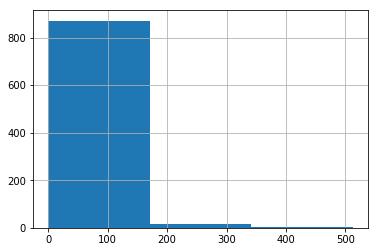

In [33]:
df['Fare'].hist(bins=3)

In [37]:
def test_function(age):
    if age % 2 == 0:
        return 'even'
    else:
        return 'odd'
    
df['odd_even_age'] = df['Age'].apply(test_function)

In [38]:
df[['Age', 'odd_even_age']].head()

,Age,odd_even_age
0,22.0,even
1,38.0,even
2,26.0,even
3,35.0,odd
4,35.0,odd


In [39]:
df['odd_even_age'].value_counts()

odd     511
even    380
Name: odd_even_age, dtype: int64

In [44]:
def test_function_row(row):
    return row['SibSp'] + row['Parch']

df['family_size_v2'] = df.apply(test_function_row, axis = 1)

In [46]:
df[['family_size_v2', 'SibSp', 'Parch']].tail()

,family_size_v2,SibSp,Parch
886,0,0,0
887,0,0,0
888,3,1,2
889,0,0,0
890,0,0,0
